# Statistiques descriptives : compagnies offrant des spectacles

## Importations et chargement des données

In [1]:
import pandas as pd
import os
import s3fs
import warnings
from datetime import date, timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
# Import KPI construction functions
#exec(open('0_KPI_functions.py').read())
exec(open('../0_KPI_functions.py').read())


In [3]:
# Create filesystem object
S3_ENDPOINT_URL = "https://" + os.environ["AWS_S3_ENDPOINT"]
fs = s3fs.S3FileSystem(client_kwargs={'endpoint_url': S3_ENDPOINT_URL})

BUCKET = "projet-bdc2324-team1/0_Input/Company_10"
fs.ls(BUCKET)

['projet-bdc2324-team1/0_Input/Company_10/campaigns_information.csv',
 'projet-bdc2324-team1/0_Input/Company_10/customerplus_cleaned.csv',
 'projet-bdc2324-team1/0_Input/Company_10/products_purchased_reduced.csv',
 'projet-bdc2324-team1/0_Input/Company_10/target_information.csv']

In [4]:
# test avec company 10

dic_base=['campaigns_information','customerplus_cleaned','products_purchased_reduced','target_information']
for nom_base in dic_base:
    FILE_PATH_S3_fanta = 'projet-bdc2324-team1/0_Input/Company_10/' + nom_base + '.csv'
    with fs.open(FILE_PATH_S3_fanta, mode="rb") as file_in:
        globals()[nom_base] = pd.read_csv(file_in, sep=",")

In [5]:
# fonction permettant d'extraire une table à partir du numéro de la compagnie (directory_path)

def display_databases(directory_path, file_name, datetime_col = None):
    """
    This function returns the file from s3 storage 
    """
    file_path = "projet-bdc2324-team1" + "/0_Input/Company_" + directory_path + "/" + file_name + ".csv"
    print("File path : ", file_path)
    with fs.open(file_path, mode="rb") as file_in:
        df = pd.read_csv(file_in, sep=",", parse_dates = datetime_col, date_parser=custom_date_parser)        
    return df 


In [6]:
target_information

id  customer_id           target_name  target_type_is_import  \
0      1165098       618562  Newsletter mensuelle                  False   
1      1165100       618559  Newsletter mensuelle                  False   
2      1165101       618561  Newsletter mensuelle                  False   
3      1165102       618560  Newsletter mensuelle                  False   
4      1165103       618558  Newsletter mensuelle                  False   
...        ...          ...                   ...                    ...   
69253  1698158        18580  Newsletter mensuelle                  False   
69254  1698159        18569  Newsletter mensuelle                  False   
69255  1698160         2962  Newsletter mensuelle                  False   
69256  1698161         3825  Newsletter mensuelle                  False   
69257  1698162         5731  Newsletter mensuelle                  False   

           target_type_name  
0      manual_static_filter  
1      manual_static_filter  
2      manual_static_filter  
3      manual_static_filter  
4      manual_static_filter  
...                     ...  
69253  manual_static_filter  
69254  manual_static_filter  
69255  manual_static_filter  
69256  manual_static_filter  
69257  manual_static_filter  

[69258 rows x 5 columns]

In [7]:
products_purchased_reduced

ticket_id  customer_id  purchase_id  event_type_id supplier_name  \
0         1799177        36984       409613              2       guichet   
1         1799178        36984       409613              3       guichet   
2         1799179        36984       409613              1       guichet   
3         1799180        36984       409613              1       guichet   
4         1799181        36984       409613              3       guichet   
...           ...          ...          ...            ...           ...   
492309    3252232       621716       710062              1       guichet   
492310    3252233       621716       710062              1       guichet   
492311    3252234       621716       710062              1       guichet   
492312    3252235       621716       710062              1       guichet   
492313    3252236       621716       710062              1       guichet   

                    purchase_date  amount  is_full_price name_event_types  \
0       2016-04-28 17:58:26+02:00     9.0          False            danse   
1       2016-04-28 17:58:26+02:00     9.0          False           cirque   
2       2016-04-28 17:58:26+02:00     9.0          False          théâtre   
3       2016-04-28 17:58:26+02:00     9.0          False          théâtre   
4       2016-04-28 17:58:26+02:00    12.0          False           cirque   
...                           ...     ...            ...              ...   
492309  2023-03-09 12:08:45+01:00     7.0          False          théâtre   
492310  2023-03-09 12:08:45+01:00     7.0          False          théâtre   
492311  2023-03-09 12:08:45+01:00     7.0          False          théâtre   
492312  2023-03-09 12:08:45+01:00     7.0          False          théâtre   
492313  2023-03-09 12:08:45+01:00     7.0          False          théâtre   

            name_facilities                 name_categories  \
0                le grand t            abo t gourmand jeune   
1                le grand t            abo t gourmand jeune   
2                le grand t            abo t gourmand jeune   
3                le grand t            abo t gourmand jeune   
4       la cite des congres            abo t gourmand jeune   
...                     ...                             ...   
492309             cap nort  tarif sco co 1 seance scolaire   
492310             cap nort  tarif sco co 1 seance scolaire   
492311             cap nort  tarif sco co 1 seance scolaire   
492312             cap nort  tarif sco co 1 seance scolaire   
492313             cap nort  tarif sco co 1 seance scolaire   

              name_events    name_seasons            start_date_time  \
0            aringa rossa  test 2016/2017  2016-09-27 00:00:00+02:00   
1          5èmes hurlants  test 2016/2017  2016-11-18 00:00:00+01:00   
2                dom juan  test 2016/2017  2016-12-07 00:00:00+01:00   
3         vanishing point  test 2016/2017  2017-01-04 00:00:00+01:00   
4            a o lang pho  test 2016/2017  2017-01-03 00:00:00+01:00   
...                   ...             ...                        ...   
492309  sur moi, le temps       2022/2023  2023-03-13 14:00:00+01:00   
492310  sur moi, le temps       2022/2023  2023-03-13 14:00:00+01:00   
492311  sur moi, le temps       2022/2023  2023-03-13 14:00:00+01:00   
492312  sur moi, le temps       2022/2023  2023-03-13 14:00:00+01:00   
492313  sur moi, le temps       2022/2023  2023-03-13 14:00:00+01:00   

                    end_date_time  open  
0       1901-01-01 00:09:21+00:09  True  
1       1901-01-01 00:09:21+00:09  True  
2       1901-01-01 00:09:21+00:09  True  
3       1901-01-01 00:09:21+00:09  True  
4       1901-01-01 00:09:21+00:09  True  
...                           ...   ...  
492309  1901-01-01 00:09:21+00:09  True  
492310  1901-01-01 00:09:21+00:09  True  
492311  1901-01-01 00:09:21+00:09  True  
492312  1901-01-01 00:09:21+00:09  True  
492313  1901-01-01 00:09:21+00:09  True  

[492314 rows x 16 columns]

In [8]:
# création des bases contenant les KPI pour les 5 compagnies de spectacle

# liste des compagnies de spectacle
nb_compagnie=['10','11','12','13','14']

# début de la boucle permettant de générer des datasets agrégés pour les 5 compagnies de spectacle
for directory_path in nb_compagnie:
    df_customerplus_clean_0 = display_databases(directory_path, file_name = "customerplus_cleaned")
    df_campaigns_information = display_databases(directory_path, file_name = "campaigns_information", datetime_col = ['opened_at', 'sent_at', 'campaign_sent_at'])
    df_products_purchased_reduced = display_databases(directory_path, file_name = "products_purchased_reduced", datetime_col = ['purchase_date'])
    df_target_information = display_databases(directory_path, file_name = "target_information")
    
    df_campaigns_kpi = campaigns_kpi_function(campaigns_information = df_campaigns_information) 
    df_tickets_kpi = tickets_kpi_function(tickets_information = df_products_purchased_reduced)
    df_customerplus_clean = customerplus_kpi_function(customerplus_clean = df_customerplus_clean_0)

        
# creation de la colonne Number compagnie, qui permettra d'agréger les résultats
    df_tickets_kpi["number_compagny"]=int(directory_path)
    df_campaigns_kpi["number_compagny"]=int(directory_path)
    df_customerplus_clean["number_compagny"]=int(directory_path)
    df_target_information["number_compagny"]=int(directory_path)

    if nb_compagnie.index(directory_path)>=1:
        customerplus_clean_spectacle=pd.concat([customerplus_clean_spectacle,df_customerplus_clean],axis=0)
        campaigns_information_spectacle=pd.concat([campaigns_information_spectacle,df_campaigns_kpi],axis=0)
        products_purchased_reduced_spectacle=pd.concat([products_purchased_reduced_spectacle,df_tickets_kpi],axis=0)
        target_information_spectacle=pd.concat([target_information_spectacle,df_target_information],axis=0)
    else:
        customerplus_clean_spectacle=df_customerplus_clean
        campaigns_information_spectacle=df_campaigns_kpi
        products_purchased_reduced_spectacle=df_tickets_kpi
        target_information_spectacle=df_target_information

    print(f"Tables imported for tenant {directory_path}")

File path :  projet-bdc2324-team1/0_Input/Company_10/customerplus_cleaned.csv


/tmp/ipykernel_427/3170175140.py:10: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(file_in, sep=",", parse_dates = datetime_col, date_parser=custom_date_parser)


File path :  projet-bdc2324-team1/0_Input/Company_10/campaigns_information.csv


/tmp/ipykernel_427/3170175140.py:10: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(file_in, sep=",", parse_dates = datetime_col, date_parser=custom_date_parser)


File path :  projet-bdc2324-team1/0_Input/Company_10/products_purchased_reduced.csv


/tmp/ipykernel_427/3170175140.py:10: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(file_in, sep=",", parse_dates = datetime_col, date_parser=custom_date_parser)


File path :  projet-bdc2324-team1/0_Input/Company_10/target_information.csv


/tmp/ipykernel_427/3170175140.py:10: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(file_in, sep=",", parse_dates = datetime_col, date_parser=custom_date_parser)
<string>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Tables imported for tenant 10
File path :  projet-bdc2324-team1/0_Input/Company_11/customerplus_cleaned.csv


/tmp/ipykernel_427/3170175140.py:10: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(file_in, sep=",", parse_dates = datetime_col, date_parser=custom_date_parser)


File path :  projet-bdc2324-team1/0_Input/Company_11/campaigns_information.csv


/tmp/ipykernel_427/3170175140.py:10: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(file_in, sep=",", parse_dates = datetime_col, date_parser=custom_date_parser)


File path :  projet-bdc2324-team1/0_Input/Company_11/products_purchased_reduced.csv


/tmp/ipykernel_427/3170175140.py:10: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(file_in, sep=",", parse_dates = datetime_col, date_parser=custom_date_parser)


File path :  projet-bdc2324-team1/0_Input/Company_11/target_information.csv


/tmp/ipykernel_427/3170175140.py:10: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(file_in, sep=",", parse_dates = datetime_col, date_parser=custom_date_parser)
<string>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Tables imported for tenant 11
File path :  projet-bdc2324-team1/0_Input/Company_12/customerplus_cleaned.csv


/tmp/ipykernel_427/3170175140.py:10: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(file_in, sep=",", parse_dates = datetime_col, date_parser=custom_date_parser)


File path :  projet-bdc2324-team1/0_Input/Company_12/campaigns_information.csv


/tmp/ipykernel_427/3170175140.py:10: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(file_in, sep=",", parse_dates = datetime_col, date_parser=custom_date_parser)


File path :  projet-bdc2324-team1/0_Input/Company_12/products_purchased_reduced.csv


/tmp/ipykernel_427/3170175140.py:10: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(file_in, sep=",", parse_dates = datetime_col, date_parser=custom_date_parser)
/tmp/ipykernel_427/3170175140.py:10: DtypeWarning: Columns (4,8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_in, sep=",", parse_dates = datetime_col, date_parser=custom_date_parser)


File path :  projet-bdc2324-team1/0_Input/Company_12/target_information.csv


/tmp/ipykernel_427/3170175140.py:10: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(file_in, sep=",", parse_dates = datetime_col, date_parser=custom_date_parser)
<string>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Tables imported for tenant 12
File path :  projet-bdc2324-team1/0_Input/Company_13/customerplus_cleaned.csv


/tmp/ipykernel_427/3170175140.py:10: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(file_in, sep=",", parse_dates = datetime_col, date_parser=custom_date_parser)


File path :  projet-bdc2324-team1/0_Input/Company_13/campaigns_information.csv


/tmp/ipykernel_427/3170175140.py:10: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(file_in, sep=",", parse_dates = datetime_col, date_parser=custom_date_parser)


File path :  projet-bdc2324-team1/0_Input/Company_13/products_purchased_reduced.csv


/tmp/ipykernel_427/3170175140.py:10: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(file_in, sep=",", parse_dates = datetime_col, date_parser=custom_date_parser)


File path :  projet-bdc2324-team1/0_Input/Company_13/target_information.csv


/tmp/ipykernel_427/3170175140.py:10: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(file_in, sep=",", parse_dates = datetime_col, date_parser=custom_date_parser)
<string>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Tables imported for tenant 13
File path :  projet-bdc2324-team1/0_Input/Company_14/customerplus_cleaned.csv


/tmp/ipykernel_427/3170175140.py:10: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(file_in, sep=",", parse_dates = datetime_col, date_parser=custom_date_parser)


File path :  projet-bdc2324-team1/0_Input/Company_14/campaigns_information.csv


/tmp/ipykernel_427/3170175140.py:10: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(file_in, sep=",", parse_dates = datetime_col, date_parser=custom_date_parser)


File path :  projet-bdc2324-team1/0_Input/Company_14/products_purchased_reduced.csv


/tmp/ipykernel_427/3170175140.py:10: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(file_in, sep=",", parse_dates = datetime_col, date_parser=custom_date_parser)
/tmp/ipykernel_427/3170175140.py:10: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_in, sep=",", parse_dates = datetime_col, date_parser=custom_date_parser)


File path :  projet-bdc2324-team1/0_Input/Company_14/target_information.csv


/tmp/ipykernel_427/3170175140.py:10: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(file_in, sep=",", parse_dates = datetime_col, date_parser=custom_date_parser)
<string>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Tables imported for tenant 14


In [37]:
customerplus_clean_spectacle[customerplus_clean_spectacle["customer_id"]==2]

customer_id  street_id  structure_id  mcp_contact_id  fidelity  \
17                2        139           NaN             NaN         0   
18031             2     319517           NaN             NaN         0   
291642            2     757541         303.0             5.0         1   

        tenant_id  is_partner  deleted_at  gender  is_email_true  ...  \
17            875       False         NaN       2          False  ...   
18031        1556       False         NaN       0           True  ...   
291642        862       False         NaN       1           True  ...   

        purchase_count          first_buying_date  country  gender_label  \
17                   3                        NaN      NaN         other   
18031                2  2020-01-01 14:06:52+00:00       fr        female   
291642               3  2016-09-08 14:50:00+00:00       fr          male   

        gender_female  gender_male  gender_other  country_fr  has_tags  \
17                  0            0             1         NaN         0   
18031               1            0             0         1.0         0   
291642              0            1             0         1.0         1   

        number_compagny  
17                   10  
18031                11  
291642               14  

[3 rows x 29 columns]

In [1]:
customerplus_clean_spectacle[customerplus_clean_spectacle["customer_id"]==1]

NameError: name 'customerplus_clean_spectacle' is not defined

In [39]:
customerplus_clean_spectacle.columns

Index(['customer_id', 'street_id', 'structure_id', 'mcp_contact_id',
       'fidelity', 'tenant_id', 'is_partner', 'deleted_at', 'gender',
       'is_email_true', 'opt_in', 'last_buying_date', 'max_price',
       'ticket_sum', 'average_price', 'average_purchase_delay',
       'average_price_basket', 'average_ticket_basket', 'total_price',
       'purchase_count', 'first_buying_date', 'country', 'gender_label',
       'gender_female', 'gender_male', 'gender_other', 'country_fr',
       'has_tags', 'number_compagny'],
      dtype='object')

In [38]:
#customerplus_clean_spectacle.isna().sum()
#campaigns_information_spectacle.isna().sum()
#products_purchased_reduced_spectacle.isna().sum()
#target_information_spectacle.isna().sum()

### Ajout : importation de la table train_set pour faire les stats desc dessus

In [9]:
# importation de la table train_set pour les compagnies de spectacle (ou musique)

S3_ENDPOINT_URL = "https://" + os.environ["AWS_S3_ENDPOINT"]
fs = s3fs.S3FileSystem(client_kwargs={'endpoint_url': S3_ENDPOINT_URL})

path_train_set_spectacle = "projet-bdc2324-team1/Generalization/musique/Train_set.csv"

with fs.open(path_train_set_spectacle, mode="rb") as file_in:
        train_set_spectacle = pd.read_csv(file_in, sep=",")

/tmp/ipykernel_427/3450421856.py:9: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  train_set_spectacle = pd.read_csv(file_in, sep=",")


In [12]:
train_set_spectacle.head()

customer_id  nb_tickets  nb_purchases  total_amount  nb_suppliers  \
0   10_299341         0.0           0.0           0.0           0.0   
1    10_63788         3.0           2.0          62.0           1.0   
2   10_759946         0.0           0.0           0.0           0.0   
3    10_20653         0.0           0.0           0.0           0.0   
4   10_824705         0.0           0.0           0.0           0.0   

   vente_internet_max  purchase_date_min  purchase_date_max  \
0                 0.0                NaN                NaN   
1                 1.0         393.205891         281.017639   
2                 0.0                NaN                NaN   
3                 0.0                NaN                NaN   
4                 0.0                NaN                NaN   

   time_between_purchase  nb_tickets_internet  ...  country  gender_label  \
0                    NaN                  0.0  ...       fr          male   
1             112.188252                  3.0  ...       fr        female   
2                    NaN                  0.0  ...      NaN         other   
3                    NaN                  0.0  ...       fr          male   
4                    NaN                  0.0  ...      NaN         other   

   gender_female  gender_male  gender_other  country_fr  nb_campaigns  \
0              0            1             0         1.0          12.0   
1              1            0             0         1.0           3.0   
2              0            0             1         NaN           0.0   
3              0            1             0         1.0          11.0   
4              0            0             1         NaN           0.0   

   nb_campaigns_opened               time_to_open  y_has_purchased  
0                  3.0  0 days 05:47:26.333333333              0.0  
1                  1.0            0 days 05:13:51              1.0  
2                  0.0                        NaN              0.0  
3                 10.0            1 days 00:45:54              0.0  
4                  0.0                        NaN              0.0  

[5 rows x 40 columns]

In [11]:
# on remplace les valeurs has purchased = NaN par des 0
train_set_spectacle["y_has_purchased"] = train_set_spectacle["y_has_purchased"].fillna(0)
train_set_spectacle["y_has_purchased"].unique()

array([0., 1.])

In [66]:
# on reproduit une colonne avec le numéro de la compagnie 

train_set_spectacle["number_company"] = train_set_spectacle["customer_id"].apply(lambda x : int(re.split("_", str(x))[0]))
train_set_spectacle["number_company"].unique()

array([10, 11, 12, 13, 14])

In [71]:
train_set_spectacle.head()

customer_id  nb_tickets  nb_purchases  total_amount  nb_suppliers  \
0   10_299341         0.0           0.0           0.0           0.0   
1    10_63788         3.0           2.0          62.0           1.0   
2   10_759946         0.0           0.0           0.0           0.0   
3    10_20653         0.0           0.0           0.0           0.0   
4   10_824705         0.0           0.0           0.0           0.0   

   vente_internet_max  purchase_date_min  purchase_date_max  \
0                 0.0                NaN                NaN   
1                 1.0         393.205891         281.017639   
2                 0.0                NaN                NaN   
3                 0.0                NaN                NaN   
4                 0.0                NaN                NaN   

   time_between_purchase  nb_tickets_internet  ...  gender_label  \
0                    NaN                  0.0  ...          male   
1             112.188252                  3.0  ...        female   
2                    NaN                  0.0  ...         other   
3                    NaN                  0.0  ...          male   
4                    NaN                  0.0  ...         other   

   gender_female  gender_male  gender_other  country_fr  nb_campaigns  \
0              0            1             0         1.0          12.0   
1              1            0             0         1.0           3.0   
2              0            0             1         NaN           0.0   
3              0            1             0         1.0          11.0   
4              0            0             1         NaN           0.0   

   nb_campaigns_opened               time_to_open  y_has_purchased  \
0                  3.0  0 days 05:47:26.333333333              0.0   
1                  1.0            0 days 05:13:51              1.0   
2                  0.0                        NaN              0.0   
3                 10.0            1 days 00:45:54              0.0   
4                  0.0                        NaN              0.0   

   number_company  
0              10  
1              10  
2              10  
3              10  
4              10  

[5 rows x 41 columns]

## Statistiques descriptives

### 0. Détection du client anonyme (outlier) - utile pour la section 3

In [101]:
def outlier_detection(directory_path = "1", coupure = 1):
    df_tickets = display_databases(directory_path, file_name = 'products_purchased_reduced' , datetime_col = ['purchase_date'])
    df_tickets_kpi = tickets_kpi_function(df_tickets)

    if directory_path == "101" :
        df_tickets_1 = display_databases(directory_path, file_name = 'products_purchased_reduced_1' , datetime_col = ['purchase_date'])
        df_tickets_kpi_1 = tickets_kpi_function(df_tickets_1)

        df_tickets_kpi = pd.concat([df_tickets_kpi, df_tickets_kpi_1])
    # Part du CA par customer
    total_amount_share = df_tickets_kpi.groupby('customer_id')['total_amount'].sum().reset_index()
    total_amount_share['total_amount_entreprise'] = total_amount_share['total_amount'].sum()
    total_amount_share['share_total_amount'] = total_amount_share['total_amount']/total_amount_share['total_amount_entreprise']
    
    total_amount_share_index = total_amount_share.set_index('customer_id')
    df_circulaire = total_amount_share_index['total_amount'].sort_values(axis = 0, ascending = False)
    
    top = df_circulaire[:coupure]
    rest = df_circulaire[coupure:]
    
    # Calculez la somme du reste
    rest_sum = rest.sum()
    
    # Créez une nouvelle série avec les cinq plus grandes parts et 'Autre'
    new_series = pd.concat([top, pd.Series([rest_sum], index=['Autre'])])
    
    # Créez le graphique circulaire
    plt.figure(figsize=(3, 3))
    plt.pie(new_series, labels=new_series.index, autopct='%1.1f%%', startangle=140, pctdistance=0.5)
    plt.axis('equal')  # Assurez-vous que le graphique est un cercle
    plt.title('Répartition des montants totaux')
    plt.show()


In [102]:
# def d'une fonction permettant de générer un barplot à plusieurs barres selon une modalité 

def multiple_barplot(data, x, y, var_labels, bar_width=0.35,
                    figsize=(10, 6), xlabel=None, ylabel=None, title=None, dico_labels = None) :

    # si on donne aucun nom pour la legende, le graphique reprend les noms des variables x et y 
    xlabel = x if xlabel==None else xlabel
    ylabel = y if ylabel==None else ylabel
    
    fig, ax = plt.subplots(figsize=figsize)
    
    categories = data[x].unique()
    bar_width = bar_width
    bar_positions = np.arange(len(categories))
    
    # Grouper les données par label et créer les barres groupées
    for label in data[var_labels].unique():
        label_data = data[data[var_labels] == label]
        values = [label_data[label_data[x] == category][y].values[0] for category in categories]
    
        # label_printed = "achat durant la période" if label else "aucun achat"
        label_printed = f"{var_labels}={label}" if dico_labels==None else dico_labels[label]
        
        ax.bar(bar_positions, values, bar_width, label=label_printed)
    
        # Mise à jour des positions des barres pour le prochain groupe
        bar_positions = [pos + bar_width for pos in bar_positions]

    # Ajout des étiquettes, de la légende, etc.
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks([pos + bar_width / 2 for pos in np.arange(len(categories))])
    ax.set_xticklabels(categories)
    ax.legend()
    
    # Affichage du plot - la proportion de français est la même selon qu'il y ait achat sur la période ou non
    # sauf compagnie 12, et peut-être 13
    plt.show()

File path :  projet-bdc2324-team1/0_Input/Company_10/products_purchased_reduced.csv


/tmp/ipykernel_1173/2987234667.py:8: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(file_in, sep=",", parse_dates = datetime_col, date_parser=custom_date_parser)


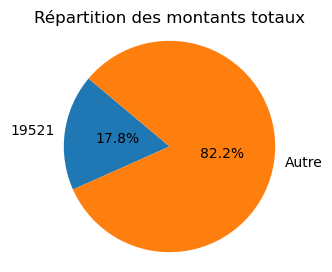

In [48]:
# outlier à enlever (dépend des stats desc !)
outlier_detection(directory_path="10") # mettre 2 si on veut le 1er client non anonyme

In [ ]:
# boucle pour identifier les outliers de chaque compagnie (et le client principal non anonyme)

# nb_compagnie=['10','11','12','13','14']
for company_number in nb_compagnie :
    print(f"outlier for tenant {company_number}")
    outlier_detection(directory_path=company_number, coupure = 2)

In [ ]:
# print(products_purchased_reduced_spectacle.loc[products_purchased_reduced_spectacle["number_compagny"]==10]["total_amount"].describe())

products_purchased_reduced_spectacle.loc[(products_purchased_reduced_spectacle["number_compagny"]==10) & 
(products_purchased_reduced_spectacle["customer_id"]==19521)]

In [ ]:
# company 11 
# etrange, pas de vente sur internet, et un seul supplier. Plus de 9k achats
products_purchased_reduced_spectacle.loc[(products_purchased_reduced_spectacle["number_compagny"]==11) & 
(products_purchased_reduced_spectacle["customer_id"]==36)]

In [ ]:
# company 12
products_purchased_reduced_spectacle.loc[(products_purchased_reduced_spectacle["number_compagny"]==12) & 
(products_purchased_reduced_spectacle["customer_id"]==1706757)]

In [ ]:
# company 13
products_purchased_reduced_spectacle.loc[(products_purchased_reduced_spectacle["number_compagny"]==13) & 
(products_purchased_reduced_spectacle["customer_id"]==8422)]

In [ ]:
# company 14
# a-t-on vrmt un outlier ? A acheté quasi 3k tickets, pr 96 achats
products_purchased_reduced_spectacle.loc[(products_purchased_reduced_spectacle["number_compagny"]==14) & 
(products_purchased_reduced_spectacle["customer_id"]==6354)]

In [ ]:
# verifs dans les tables customerplus (outlier incertain pr 11 et 14)

customerplus_clean_spectacle.loc[(customerplus_clean_spectacle["customer_id"]==36) &
(customerplus_clean_spectacle["number_compagny"]==11)]

In [ ]:
customerplus_clean_spectacle.loc[(customerplus_clean_spectacle["customer_id"]==6354) &
(customerplus_clean_spectacle["number_compagny"]==14)]

In [ ]:
customerplus_clean_spectacle.loc[(customerplus_clean_spectacle["customer_id"]==8422) &
(customerplus_clean_spectacle["number_compagny"]==13)]

In [ ]:
customerplus_clean_spectacle.loc[(customerplus_clean_spectacle["customer_id"]==19521) &
(customerplus_clean_spectacle["number_compagny"]==10)]

In [ ]:
customerplus_clean_spectacle.columns

### 1. customerplus_clean

In [44]:
# visu de la table
customerplus_clean_spectacle.head(10)

customer_id  street_id  structure_id  mcp_contact_id  fidelity  tenant_id  \
0       821538        139           NaN             NaN         0        875   
1       809126       1063           NaN             NaN         0        875   
2        11005       1063           NaN             NaN         0        875   
3        17663      12731           NaN             NaN         0        875   
4        38100      12395           NaN             NaN         0        875   
5       307036        139           NaN             NaN         0        875   
6         2946       1063           NaN             NaN         0        875   
7        18441      11139           NaN             NaN         0        875   
8         9231        139           NaN             NaN         0        875   
9         9870        139           NaN             NaN         0        875   

   is_partner  deleted_at  gender  is_email_true  ...  purchase_count  \
0       False         NaN       2           True  ...               0   
1       False         NaN       2           True  ...               0   
2       False         NaN       2          False  ...              14   
3       False         NaN       0          False  ...               1   
4       False         NaN       0           True  ...               1   
5       False         NaN       2           True  ...               1   
6       False         NaN       2          False  ...               8   
7       False         NaN       2          False  ...               3   
8       False         NaN       0           True  ...               1   
9       False         NaN       2           True  ...               1   

  first_buying_date  country  gender_label  gender_female  gender_male  \
0               NaN      NaN         other              0            0   
1               NaN       fr         other              0            0   
2               NaN       fr         other              0            0   
3               NaN       fr        female              1            0   
4               NaN       fr        female              1            0   
5               NaN      NaN         other              0            0   
6               NaN       fr         other              0            0   
7               NaN       fr         other              0            0   
8               NaN      NaN        female              1            0   
9               NaN      NaN         other              0            0   

   gender_other  country_fr  has_tags  number_compagny  
0             1         NaN         0               10  
1             1         1.0         0               10  
2             1         1.0         0               10  
3             0         1.0         0               10  
4             0         1.0         0               10  
5             1         NaN         0               10  
6             1         1.0         0               10  
7             1         1.0         0               10  
8             0         NaN         0               10  
9             1         NaN         0               10  

[10 rows x 29 columns]

In [43]:
# nombre de NaN
print("Nombre de lignes de la table : ",customerplus_clean_spectacle.shape[0])
customerplus_clean_spectacle.isna().sum()

Nombre de lignes de la table :  1523688


customer_id                     0
street_id                       0
structure_id              1460624
mcp_contact_id             729167
fidelity                        0
tenant_id                       0
is_partner                      0
deleted_at                1523688
gender                          0
is_email_true                   0
opt_in                          0
last_buying_date           762879
max_price                  762879
ticket_sum                      0
average_price              667328
average_purchase_delay     762915
average_price_basket       762915
average_ticket_basket      762915
total_price                 95551
purchase_count                  0
first_buying_date          762879
country                    429486
gender_label                    0
gender_female                   0
gender_male                     0
gender_other                    0
country_fr                 429486
has_tags                        0
number_compagny                 0
dtype: int64

In [148]:
# nombre de clients de la compagnie (pas les clients visés par une campagne mais ceux ayant acheté)
# on rq le nbre de clients est très variable : de 35k à 389k
company_nb_clients = customerplus_clean_spectacle[customerplus_clean_spectacle["purchase_count"]>0].groupby("number_compagny")["customer_id"].count().reset_index()
company_nb_clients

number_compagny  customer_id
0               10        45264
1               11        35313
2               12       216105
3               13       388731
4               14       101642

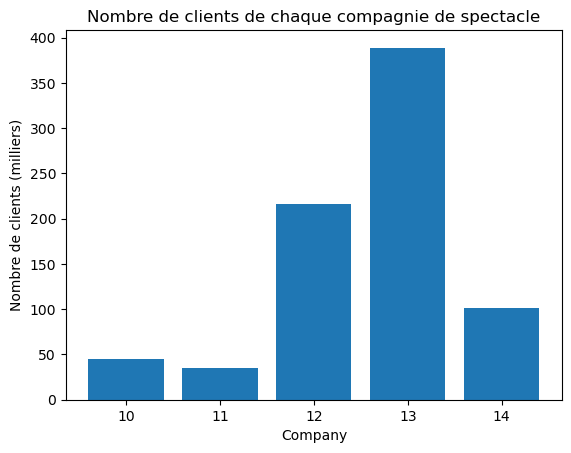

In [151]:
# Création du barplot
plt.bar(company_nb_clients["number_compagny"], company_nb_clients["customer_id"]/1000)

# Ajout de titres et d'étiquettes
plt.xlabel('Company')
plt.ylabel("Nombre de clients (milliers)")
plt.title("Nombre de clients de chaque compagnie de spectacle")

# Affichage du barplot
plt.show()

In [37]:
# nouveau barplot pr les clients : on regarde la taille totale de la base et on distingue clients ayant acheté / pas acheté

# variable relative à l'achat
customerplus_clean_spectacle["already_purchased"] = customerplus_clean_spectacle["purchase_count"]>0

nb_customers_purchasing_spectacle = customerplus_clean_spectacle[customerplus_clean_spectacle["already_purchased"]].groupby(["number_compagny","already_purchased"])["customer_id"].count().reset_index()
nb_customers_no_purchase_spectacle = customerplus_clean_spectacle[~customerplus_clean_spectacle["already_purchased"]].groupby(["number_compagny","already_purchased"])["customer_id"].count().reset_index()

print(nb_customers_purchasing_spectacle)
print(nb_customers_no_purchase_spectacle)

   number_compagny  already_purchased  customer_id
0               10               True        45264
1               11               True        35313
2               12               True       216105
3               13               True       388731
4               14               True       101642
   number_compagny  already_purchased  customer_id
0               10              False        53530
1               11              False        35994
2               12              False        26620
3               13              False       379005
4               14              False       241484


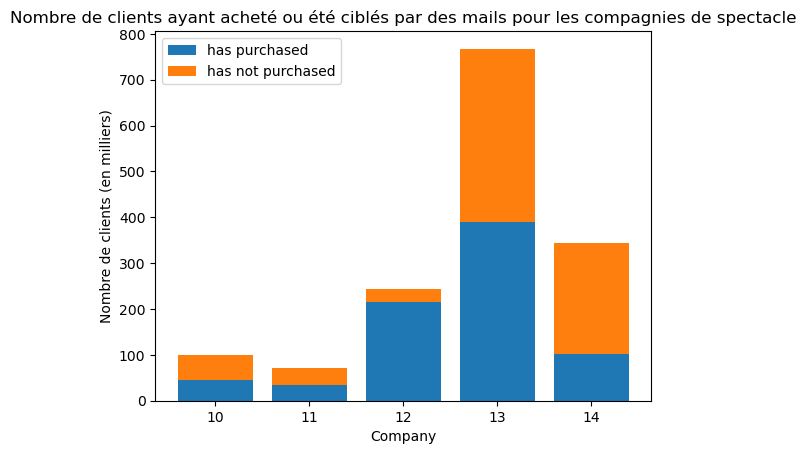

In [38]:
# Création du barplot
plt.bar(nb_customers_purchasing_spectacle["number_compagny"], nb_customers_purchasing_spectacle["customer_id"]/1000, label = "has purchased")
plt.bar(nb_customers_no_purchase_spectacle["number_compagny"], nb_customers_no_purchase_spectacle["customer_id"]/1000, 
        bottom = nb_customers_purchasing_spectacle["customer_id"]/1000, label = "has not purchased")


# Ajout de titres et d'étiquettes
plt.xlabel('Company')
plt.ylabel("Nombre de clients (en milliers)")
plt.title("Nombre de clients ayant acheté ou été ciblés par des mails pour les compagnies de spectacle")
plt.legend()

# Affichage du barplot
plt.show()


In [152]:
# prix maximal payé par un client pour chaque compagnie - très variable : de 108 à 13823

company_max_price = customerplus_clean_spectacle.groupby("number_compagny")["max_price"].max().reset_index()
company_max_price

number_compagny  max_price
0               10    13823.0
1               11      108.0
2               12     5000.0
3               13     3180.0
4               14      456.0

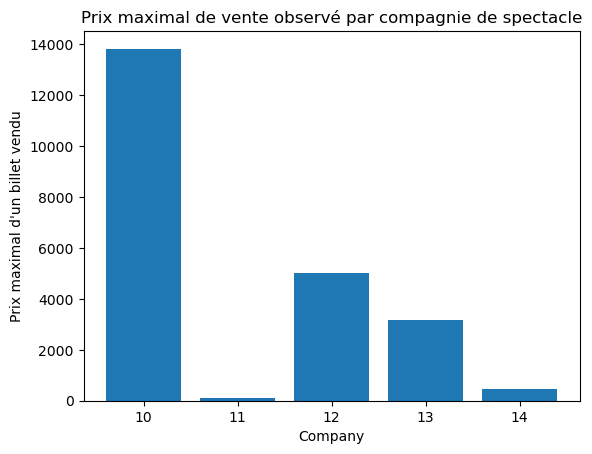

In [153]:
# Création du barplot
plt.bar(company_max_price["number_compagny"], company_max_price["max_price"])

# Ajout de titres et d'étiquettes
plt.xlabel('Company')
plt.ylabel("Prix maximal d'un billet vendu")
plt.title("Prix maximal de vente observé par compagnie de spectacle")

# Affichage du barplot
plt.show()

In [71]:
customerplus_clean_spectacle[customerplus_clean_spectacle["first_buying_date"].isna()]["purchase_count"].describe()

count    762879.000000
mean          0.079068
std           3.969729
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        3334.000000
Name: purchase_count, dtype: float64

In [72]:
customerplus_clean_spectacle[~customerplus_clean_spectacle["first_buying_date"].isna()]["purchase_count"].describe()

count    7.608090e+05
mean     3.863940e+00
std      1.685825e+03
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      1.469325e+06
Name: purchase_count, dtype: float64

In [77]:
customerplus_clean_spectacle["already_purchased"] = customerplus_clean_spectacle["first_buying_date"].isna()==False
customerplus_clean_spectacle

customer_id  street_id  structure_id  mcp_contact_id  fidelity  \
0            821538        139           NaN             NaN         0   
1            809126       1063           NaN             NaN         0   
2             11005       1063           NaN             NaN         0   
3             17663      12731           NaN             NaN         0   
4             38100      12395           NaN             NaN         0   
...             ...        ...           ...             ...       ...   
343121      4667645        122           NaN       1534181.0         0   
343122      4667649        122           NaN       1534177.0         0   
343123      4667660        122           NaN       1534165.0         0   
343124      4667679        122           NaN       1534132.0         0   
343125      4667686        122           NaN       1567949.0         0   

        tenant_id  is_partner  deleted_at  gender  is_email_true  ...  \
0             875       False         NaN       2           True  ...   
1             875       False         NaN       2           True  ...   
2             875       False         NaN       2          False  ...   
3             875       False         NaN       0          False  ...   
4             875       False         NaN       0           True  ...   
...           ...         ...         ...     ...            ...  ...   
343121        862       False         NaN       2           True  ...   
343122        862       False         NaN       2           True  ...   
343123        862       False         NaN       0           True  ...   
343124        862       False         NaN       2           True  ...   
343125        862       False         NaN       0           True  ...   

        first_buying_date country  gender_label  gender_female  gender_male  \
0                     NaN     NaN         other              0            0   
1                     NaN      fr         other              0            0   
2                     NaN      fr         other              0            0   
3                     NaN      fr        female              1            0   
4                     NaN      fr        female              1            0   
...                   ...     ...           ...            ...          ...   
343121                NaN     NaN         other              0            0   
343122                NaN     NaN         other              0            0   
343123                NaN     NaN        female              1            0   
343124                NaN     NaN         other              0            0   
343125                NaN     NaN        female              1            0   

        gender_other  country_fr  has_tags  number_compagny  already_purchased  
0                  1         NaN         0               10              False  
1                  1         1.0         0               10              False  
2                  1         1.0         0               10              False  
3                  0         1.0         0               10              False  
4                  0         1.0         0               10              False  
...              ...         ...       ...              ...                ...  
343121             1         NaN         0               14              False  
343122             1         NaN         0               14              False  
343123             0         NaN         0               14              False  
343124             1         NaN         0               14              False  
343125             0         NaN         0               14              False  

[1523688 rows x 30 columns]

In [83]:
# attention, on a des cas où le client a pas de première date d'achat alors qu'il compte plusieurs achats
# on peut donc avoir une date de première achat valant NaN non pas parce que l'individu n'a jamais acheté 
# mais simplement car elle n'est pas renseignée

customerplus_clean_spectacle[(customerplus_clean_spectacle["already_purchased"]==False) &
(customerplus_clean_spectacle["purchase_count"]>0)]

customer_id  street_id  structure_id  mcp_contact_id  fidelity  \
2             11005       1063           NaN             NaN         0   
3             17663      12731           NaN             NaN         0   
4             38100      12395           NaN             NaN         0   
5            307036        139           NaN             NaN         0   
6              2946       1063           NaN             NaN         0   
...             ...        ...           ...             ...       ...   
338933      3625705     648752           NaN       1253864.0         0   
338954      3627626     636890           NaN       1253887.0         0   
338959      3628124     653042           NaN       1253899.0         0   
338986      3631189     648423           NaN       1253928.0         0   
339039      3635380     659417           NaN       1253975.0         0   

        tenant_id  is_partner  deleted_at  gender  is_email_true  ...  \
2             875       False         NaN       2          False  ...   
3             875       False         NaN       0          False  ...   
4             875       False         NaN       0           True  ...   
5             875       False         NaN       2           True  ...   
6             875       False         NaN       2          False  ...   
...           ...         ...         ...     ...            ...  ...   
338933        862       False         NaN       0           True  ...   
338954        862       False         NaN       0           True  ...   
338959        862       False         NaN       0           True  ...   
338986        862       False         NaN       0           True  ...   
339039        862       False         NaN       1           True  ...   

        first_buying_date country  gender_label  gender_female  gender_male  \
2                     NaN      fr         other              0            0   
3                     NaN      fr        female              1            0   
4                     NaN      fr        female              1            0   
5                     NaN     NaN         other              0            0   
6                     NaN      fr         other              0            0   
...                   ...     ...           ...            ...          ...   
338933                NaN      fr        female              1            0   
338954                NaN      fr        female              1            0   
338959                NaN      fr        female              1            0   
338986                NaN      fr        female              1            0   
339039                NaN      fr          male              0            1   

        gender_other  country_fr  has_tags  number_compagny  already_purchased  
2                  1         1.0         0               10              False  
3                  0         1.0         0               10              False  
4                  0         1.0         0               10              False  
5                  1         NaN         0               10              False  
6                  1         1.0         0               10              False  
...              ...         ...       ...              ...                ...  
338933             0         1.0         0               14              False  
338954             0         1.0         0               14              False  
338959             0         1.0         0               14              False  
338986             0         1.0         0               14              False  
339039             0         1.0         0               14              False  

[26246 rows x 30 columns]

In [80]:
# cpdt, si un client a un nombre d'achats nul, il a bien une date de premier achat valant NaN, OK
customerplus_clean_spectacle[(customerplus_clean_spectacle["already_purchased"]) &
(customerplus_clean_spectacle["purchase_count"]==0)]

Empty DataFrame
Columns: [customer_id, street_id, structure_id, mcp_contact_id, fidelity, tenant_id, is_partner, deleted_at, gender, is_email_true, opt_in, last_buying_date, max_price, ticket_sum, average_price, average_purchase_delay, average_price_basket, average_ticket_basket, total_price, purchase_count, first_buying_date, country, gender_label, gender_female, gender_male, gender_other, country_fr, has_tags, number_compagny, already_purchased]
Index: []

[0 rows x 30 columns]

In [89]:
# différence de consentement aux campagnes de mails (opt in)

# en se restreignant au personnes n'ayant pas acheté, on a quand même des individus acceptant d'être ciblés
customerplus_clean_spectacle[customerplus_clean_spectacle["first_buying_date"].isna()]["opt_in"].unique()

# taux de consentement variés
customerplus_clean_spectacle["already_purchased"] = customerplus_clean_spectacle["purchase_count"] > 0
customerplus_clean_spectacle.groupby(["number_compagny", "already_purchased"])["opt_in"].mean()

number_compagny  already_purchased
10               False                0.234840
                 True                 0.236236
11               False                0.141746
                 True                 0.002804
12               False                0.485950
                 True                 0.244779
13               False                0.084057
                 True                 0.177213
14               False                0.885553
                 True                 0.308859
Name: opt_in, dtype: float64

In [94]:
df_graph = customerplus_clean_spectacle.groupby(["number_compagny", "already_purchased"])["opt_in"].mean().reset_index()
df_graph

number_compagny  already_purchased    opt_in
0               10              False  0.234840
1               10               True  0.236236
2               11              False  0.141746
3               11               True  0.002804
4               12              False  0.485950
5               12               True  0.244779
6               13              False  0.084057
7               13               True  0.177213
8               14              False  0.885553
9               14               True  0.308859

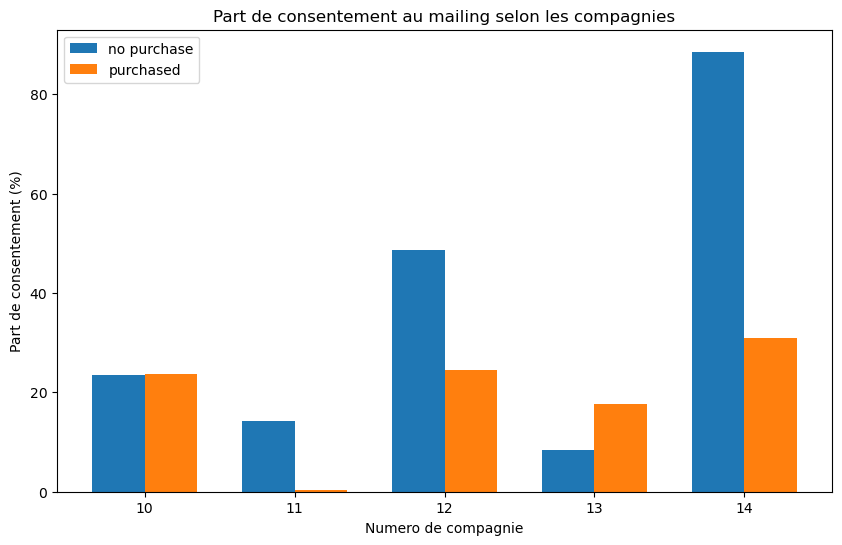

In [127]:
# Création du barplot groupé
fig, ax = plt.subplots(figsize=(10, 6))

categories = df_graph["number_compagny"].unique()
bar_width = 0.35
bar_positions = np.arange(len(categories))

# Grouper les données par label et créer les barres groupées
for label in df_graph["already_purchased"].unique():
    label_data = df_graph[df_graph['already_purchased'] == label]
    values = [label_data[label_data['number_compagny'] == category]['opt_in'].values[0]*100 for category in categories]

    label_printed = "purchased" if label else "no purchase"
    ax.bar(bar_positions, values, bar_width, label=label_printed)

    # Mise à jour des positions des barres pour le prochain groupe
    bar_positions = [pos + bar_width for pos in bar_positions]

# Ajout des étiquettes, de la légende, etc.
ax.set_xlabel('Numero de compagnie')
ax.set_ylabel('Part de consentement (%)')
ax.set_title('Part de consentement au mailing selon les compagnies')
ax.set_xticks([pos + bar_width / 2 for pos in np.arange(len(categories))])
ax.set_xticklabels(categories)
ax.legend()

# Affichage du plot
plt.show()

In [70]:
# on refait le graphique sur train set 

df_graph = train_set_spectacle.groupby(["number_company", "y_has_purchased"])["opt_in"].mean().reset_index()
df_graph["opt_in"] = 100 * df_graph["opt_in"]
df_graph

number_company  y_has_purchased     opt_in
0              10              0.0  22.681533
1              10              1.0  45.617174
2              11              0.0   8.681794
3              11              1.0   0.034686
4              12              0.0  38.730755
5              12              1.0   0.046081
6              13              0.0  12.596642
7              13              1.0  16.709675
8              14              0.0  77.789137
9              14              1.0  17.561409

In [96]:
# pourquoi une telle différence sur la variable opt in ??
print(train_set_spectacle["opt_in"].mean())
print(customerplus_clean_spectacle["opt_in"].mean())

0.43578991448407206
0.2889600758160463


0.8473746548562269
0.7573747808905485


In [76]:
# pour les autres variables, la distribution semble similaire

print("genre = homme : ")
print(train_set_spectacle["gender_male"].mean())
print(customerplus_clean_spectacle["gender_male"].mean())

print("email vérifié : ")
print(train_set_spectacle["is_email_true"].mean())
print(customerplus_clean_spectacle["is_email_true"].mean())

print("nationalité française : ")
print(train_set_spectacle["country_fr"].mean())
print(customerplus_clean_spectacle["country_fr"].mean())

# sauf pr nbre d'achats - à verif
print("nbre d'achats : ")
print(train_set_spectacle["purchase_count"].mean())
print(customerplus_clean_spectacle["purchase_count"].mean())

genre = homme : 
0.3175633912091978
0.3103916287323914
email vérifié : 
0.9581971527197163
0.9360131470484772
nationalité française : 
0.8473746548562269
0.7573747808905485
nbre d'achats : 
2.925387603847428
1.968932616126136


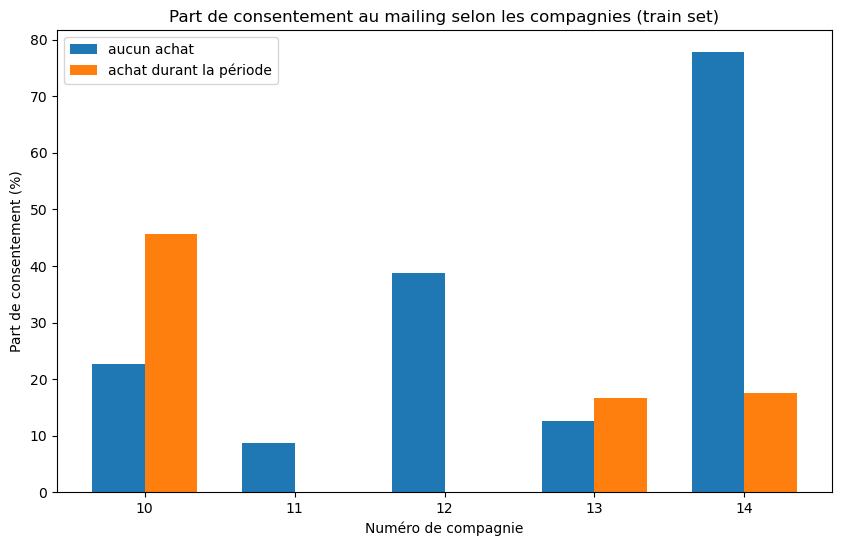

In [98]:
# with the generic function
multiple_barplot(df_graph, x="number_company", y="opt_in", var_labels="y_has_purchased",
                dico_labels = {0 : "aucun achat", 1 : "achat durant la période"},
                xlabel = "Numéro de compagnie", ylabel = "Part de consentement (%)", 
                title = "Part de consentement au mailing selon les compagnies (train set)")

In [79]:
# genre 

company_genders = customerplus_clean_spectacle.groupby("number_compagny")[["gender_male", "gender_female", "gender_other"]].mean().reset_index()
company_genders

number_compagny  gender_male  gender_female  gender_other
0               10     0.181580       0.343837      0.474583
1               11     0.179520       0.314443      0.506037
2               12     0.346380       0.454036      0.199584
3               13     0.318108       0.503092      0.178800
4               14     0.331954       0.316181      0.351865

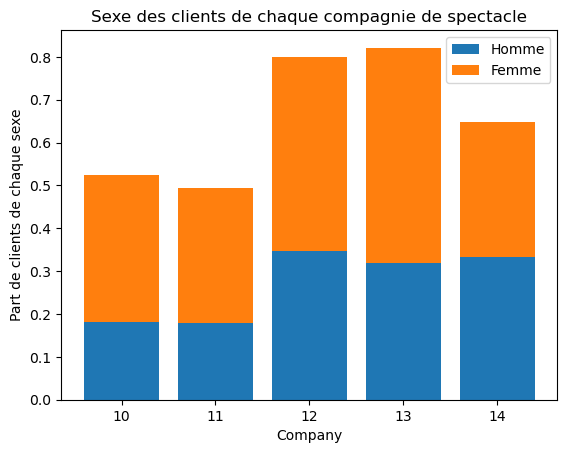

In [80]:
# Création du barplot
plt.bar(company_genders["number_compagny"], company_genders["gender_male"], label = "Homme")
plt.bar(company_genders["number_compagny"], company_genders["gender_female"], 
        bottom = company_genders["gender_male"], label = "Femme")


# Ajout de titres et d'étiquettes
plt.xlabel('Company')
plt.ylabel("Part de clients de chaque sexe")
plt.title("Sexe des clients de chaque compagnie de spectacle")
plt.legend()

# Affichage du barplot
plt.show()

In [82]:
company_genders = train_set_spectacle.groupby(["number_company", "y_has_purchased"])[["gender_male", "gender_female", "gender_other"]].mean().reset_index()
company_genders["share_of_women"] = 100 * (company_genders["gender_female"]/(1-company_genders["gender_other"]))
company_genders

number_company  y_has_purchased  gender_male  gender_female  gender_other  \
0              10              0.0     0.171838       0.333929      0.494232   
1              10              1.0     0.312165       0.683363      0.004472   
2              11              0.0     0.151162       0.273204      0.575635   
3              11              1.0     0.328477       0.597641      0.073881   
4              12              0.0     0.334546       0.433672      0.231782   
5              12              1.0     0.366020       0.506659      0.127321   
6              13              0.0     0.314243       0.503242      0.182515   
7              13              1.0     0.351721       0.504910      0.143369   
8              14              0.0     0.317971       0.296388      0.385641   
9              14              1.0     0.451289       0.485106      0.063605   

   share_of_women  
0       66.024263  
1       68.643306  
2       64.379376  
3       64.531835  
4       56.451654  
5       58.057873  
6       61.559817  
7       58.941356  
8       48.243443  
9       51.805692

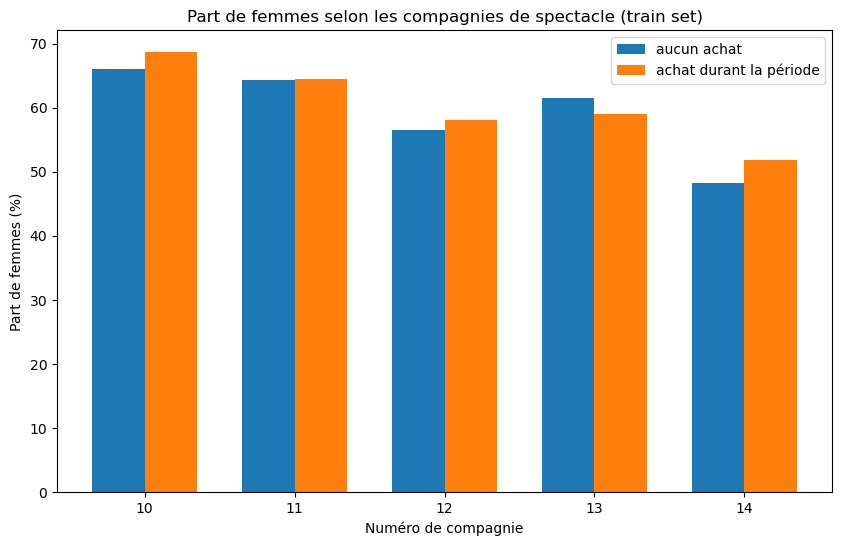

In [84]:
# création barplot avec la fonction générique

multiple_barplot(company_genders, x="number_company", y="share_of_women", var_labels="y_has_purchased",
                dico_labels = {0 : "aucun achat", 1 : "achat durant la période"},
                xlabel = "Numéro de compagnie", ylabel = "Part de femmes (%)", 
                title = "Part de femmes selon les compagnies de spectacle (train set)")

In [87]:
# pays d'origine (France VS reste du monde)

company_country_fr = customerplus_clean_spectacle.groupby("number_compagny")["country_fr"].mean().reset_index()
company_country_fr

number_compagny  country_fr
0               10    0.996136
1               11    0.994838
2               12    0.002119
3               13    0.831795
4               14    0.993978

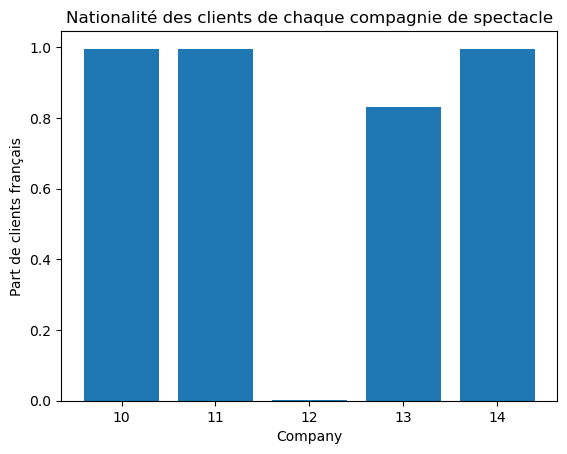

In [88]:
# Création du barplot
plt.bar(company_country_fr["number_compagny"], company_country_fr["country_fr"])

# Ajout de titres et d'étiquettes
plt.xlabel('Company')
plt.ylabel("Part de clients français")
plt.title("Nationalité des clients de chaque compagnie de spectacle")

# Affichage du barplot
plt.show()

In [90]:
# graphique sur le train set

company_country_fr = train_set_spectacle.groupby(["number_company", "y_has_purchased"])[["country_fr"]].mean().reset_index()
company_country_fr["country_fr"] = 100 * company_country_fr["country_fr"]
company_country_fr

number_company  y_has_purchased  country_fr
0              10              0.0   99.542095
1              10              1.0   99.909747
2              11              0.0   99.543280
3              11              1.0   99.501602
4              12              0.0    0.156470
5              12              1.0    0.265579
6              13              0.0   84.389610
7              13              1.0   77.596741
8              14              0.0   99.520205
9              14              1.0   98.471506

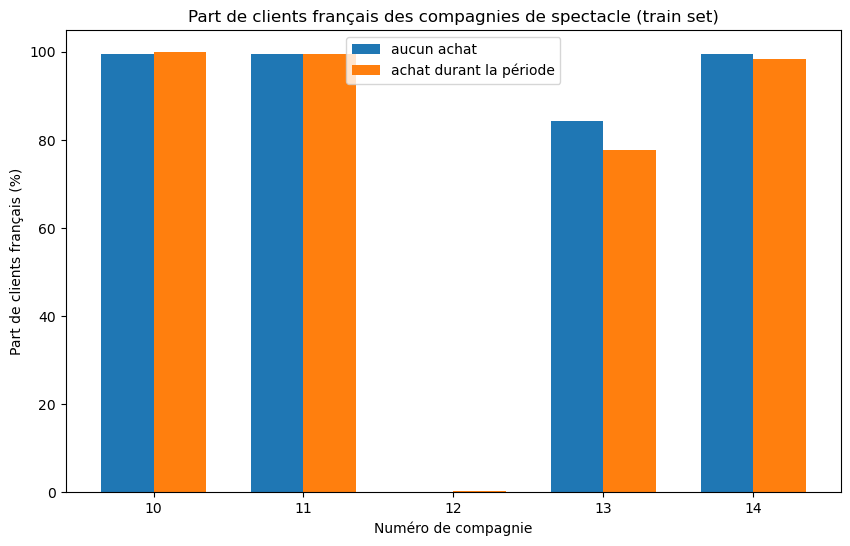

In [92]:
# generic function to generate the barplot - nationality

multiple_barplot(company_country_fr, x="number_company", y="country_fr", var_labels="y_has_purchased",
                dico_labels = {0 : "aucun achat", 1 : "achat durant la période"},
                xlabel = "Numéro de compagnie", ylabel = "Part de clients français (%)", 
                title = "Part de clients français des compagnies de spectacle (train set)")

### 2. campaigns_information

In [189]:
# nombre de nan
print("Nombre de lignes de la table : ",campaigns_information_spectacle.shape[0])
campaigns_information_spectacle.isna().sum()

Nombre de lignes de la table :  688953


customer_id                 0
nb_campaigns                0
nb_campaigns_opened         0
time_to_open           301495
number_compagny             0
dtype: int64

In [192]:
# part de clients n'ouvrant jamais les mails par compagnie

campaigns_information_spectacle["no_campaign_opened"] = pd.isna(campaigns_information_spectacle["time_to_open"])
campaigns_information_spectacle

customer_id  nb_campaigns  nb_campaigns_opened    time_to_open  \
0                29             4                  0.0             NaT   
1                37             3                  0.0             NaT   
2                39             4                  1.0 0 days 05:16:38   
3                41             4                  1.0 0 days 01:12:29   
4                44             4                  0.0             NaT   
...             ...           ...                  ...             ...   
254699      6837769             1                  1.0 0 days 23:42:15   
254700      6875038             1                  0.0             NaT   
254701      6875066             1                  0.0             NaT   
254702      6875099             1                  0.0             NaT   
254703      6875143             1                  1.0 0 days 01:17:01   

        number_compagny  no_campaign_opened  
0                    10                True  
1                    10                True  
2                    10               False  
3                    10               False  
4                    10                True  
...                 ...                 ...  
254699               14               False  
254700               14                True  
254701               14                True  
254702               14                True  
254703               14               False  

[688953 rows x 6 columns]

In [197]:
company_lazy_customers = campaigns_information_spectacle.groupby("number_compagny")["no_campaign_opened"].mean().reset_index()
company_lazy_customers

number_compagny  no_campaign_opened
0               10            0.605656
1               11            0.294001
2               12            0.475719
3               13            0.353820
4               14            0.428148

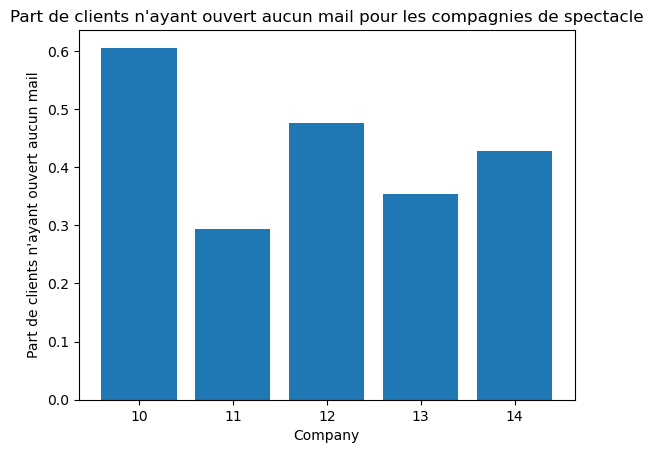

In [198]:
# Création du barplot
plt.bar(company_lazy_customers["number_compagny"], company_lazy_customers["no_campaign_opened"])

# Ajout de titres et d'étiquettes
plt.xlabel('Company')
plt.ylabel("Part de clients n'ayant ouvert aucun mail")
plt.title("Part de clients n'ayant ouvert aucun mail pour les compagnies de spectacle")

# Affichage du barplot
plt.show()

In [203]:
# taux d'ouverture des campaigns

company_campaigns_stats = campaigns_information_spectacle.groupby("number_compagny")[["nb_campaigns", "nb_campaigns_opened"]].sum().reset_index()
company_campaigns_stats["ratio_campaigns_opened"] = company_campaigns_stats["nb_campaigns_opened"]  / company_campaigns_stats["nb_campaigns"]
company_campaigns_stats

number_compagny  nb_campaigns  nb_campaigns_opened  ratio_campaigns_opened
0               10        734772             126151.0                0.171687
1               11        342396             129833.0                0.379190
2               12       3168123             810722.0                0.255900
3               13       3218569             793581.0                0.246563
4               14       2427043             723846.0                0.298242

In [15]:
# Création du barplot
plt.bar(company_campaigns_stats["number_compagny"], 100 * company_campaigns_stats["ratio_campaigns_opened"])

# Ajout de titres et d'étiquettes
plt.xlabel('Company')
plt.ylabel("Taux d'ouverture (%)")
plt.title("Taux d'ouverture des campagnes de mails pour les compagnies de spectacle")

# Affichage du barplot
plt.show()

NameError: name 'company_campaigns_stats' is not defined

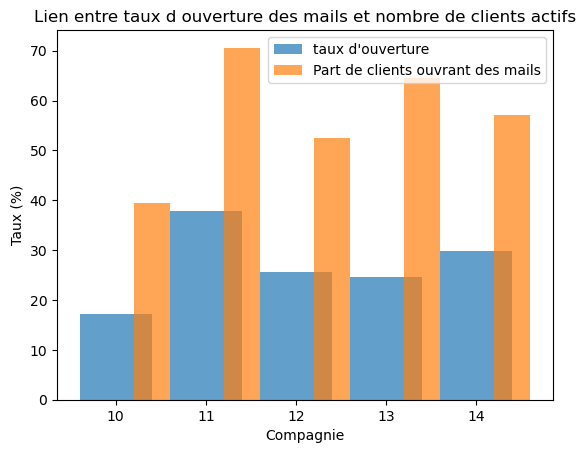

In [219]:
# création d'un barplot permettant de visualiser les 2 indicateurs sur le même graphique

# Création du premier barplot
plt.bar(company_campaigns_stats["number_compagny"], 100 * company_campaigns_stats["ratio_campaigns_opened"],
       label = "taux d'ouverture", alpha = 0.7)

# Création du deuxième barplot à côté du premier
bar_width = 0.4  # Largeur des barres
indices2 = company_campaigns_stats["number_compagny"] + bar_width
plt.bar(indices2, 100 * (1 - company_lazy_customers["no_campaign_opened"]), 
        label='Part de clients ouvrant des mails', alpha=0.7, width=bar_width)

# Ajout des étiquettes et de la légende
plt.xlabel('Compagnie')
plt.ylabel('Taux (%)')
plt.title('Lien entre taux d ouverture des mails et nombre de clients actifs')
plt.legend()

# Affichage du graphique
plt.show()

In [102]:
# same statistics on the train set

train_set_spectacle.head()

customer_id  nb_tickets  nb_purchases  total_amount  nb_suppliers  \
0   10_299341         0.0           0.0           0.0           0.0   
1    10_63788         3.0           2.0          62.0           1.0   
2   10_759946         0.0           0.0           0.0           0.0   
3    10_20653         0.0           0.0           0.0           0.0   
4   10_824705         0.0           0.0           0.0           0.0   

   vente_internet_max  purchase_date_min  purchase_date_max  \
0                 0.0                NaN                NaN   
1                 1.0         393.205891         281.017639   
2                 0.0                NaN                NaN   
3                 0.0                NaN                NaN   
4                 0.0                NaN                NaN   

   time_between_purchase  nb_tickets_internet  ...  gender_label  \
0                    NaN                  0.0  ...          male   
1             112.188252                  3.0  ...        female   
2                    NaN                  0.0  ...         other   
3                    NaN                  0.0  ...          male   
4                    NaN                  0.0  ...         other   

   gender_female  gender_male  gender_other  country_fr  nb_campaigns  \
0              0            1             0         1.0          12.0   
1              1            0             0         1.0           3.0   
2              0            0             1         NaN           0.0   
3              0            1             0         1.0          11.0   
4              0            0             1         NaN           0.0   

   nb_campaigns_opened               time_to_open  y_has_purchased  \
0                  3.0  0 days 05:47:26.333333333              0.0   
1                  1.0            0 days 05:13:51              1.0   
2                  0.0                        NaN              0.0   
3                 10.0            1 days 00:45:54              0.0   
4                  0.0                        NaN              0.0   

   number_company  
0              10  
1              10  
2              10  
3              10  
4              10  

[5 rows x 41 columns]

In [105]:
train_set_spectacle["no_campaign_opened"] = train_set_spectacle["nb_campaigns_opened"]==0

In [108]:
company_lazy_customers = train_set_spectacle.groupby(["number_company", "y_has_purchased"])["no_campaign_opened"].mean().reset_index()
company_lazy_customers["no_campaign_opened"] = 100 * company_lazy_customers["no_campaign_opened"] 
company_lazy_customers

number_company  y_has_purchased  no_campaign_opened
0              10              0.0           91.227517
1              10              1.0           62.343470
2              11              0.0           84.608320
3              11              1.0           78.598682
4              12              0.0          100.000000
5              12              1.0          100.000000
6              13              0.0           90.124799
7              13              1.0           94.158651
8              14              0.0           72.903385
9              14              1.0           73.549517

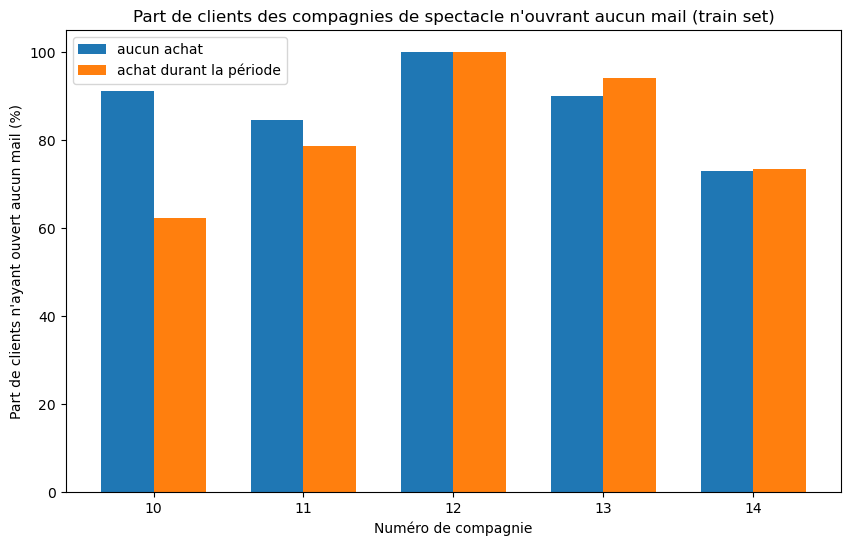

In [110]:
multiple_barplot(company_lazy_customers, x="number_company", y="no_campaign_opened", var_labels="y_has_purchased",
                dico_labels = {0 : "aucun achat", 1 : "achat durant la période"},
                xlabel = "Numéro de compagnie", ylabel = "Part de clients n'ayant ouvert aucun mail (%)", 
                title = "Part de clients des compagnies de spectacle n'ouvrant aucun mail (train set)")

In [111]:
# part de mails ouverts de chaque compagnie

train_set_spectacle

customer_id  nb_tickets  nb_purchases  total_amount  nb_suppliers  \
0        10_299341         0.0           0.0           0.0           0.0   
1         10_63788         3.0           2.0          62.0           1.0   
2        10_759946         0.0           0.0           0.0           0.0   
3         10_20653         0.0           0.0           0.0           0.0   
4        10_824705         0.0           0.0           0.0           0.0   
...            ...         ...           ...           ...           ...   
697292   14_119950         0.0           0.0           0.0           0.0   
697293      14_938         0.0           0.0           0.0           0.0   
697294  14_5004707         0.0           0.0           0.0           0.0   
697295   14_108184         0.0           0.0           0.0           0.0   
697296  14_4663981         0.0           0.0           0.0           0.0   

        vente_internet_max  purchase_date_min  purchase_date_max  \
0                      0.0                NaN                NaN   
1                      1.0         393.205891         281.017639   
2                      0.0                NaN                NaN   
3                      0.0                NaN                NaN   
4                      0.0                NaN                NaN   
...                    ...                ...                ...   
697292                 0.0                NaN                NaN   
697293                 0.0                NaN                NaN   
697294                 0.0                NaN                NaN   
697295                 0.0                NaN                NaN   
697296                 0.0                NaN                NaN   

        time_between_purchase  nb_tickets_internet  ...  gender_female  \
0                         NaN                  0.0  ...              0   
1                  112.188252                  3.0  ...              1   
2                         NaN                  0.0  ...              0   
3                         NaN                  0.0  ...              0   
4                         NaN                  0.0  ...              0   
...                       ...                  ...  ...            ...   
697292                    NaN                  0.0  ...              0   
697293                    NaN                  0.0  ...              0   
697294                    NaN                  0.0  ...              0   
697295                    NaN                  0.0  ...              0   
697296                    NaN                  0.0  ...              0   

        gender_male  gender_other  country_fr  nb_campaigns  \
0                 1             0         1.0          12.0   
1                 0             0         1.0           3.0   
2                 0             1         NaN           0.0   
3                 1             0         1.0          11.0   
4                 0             1         NaN           0.0   
...             ...           ...         ...           ...   
697292            1             0         1.0           0.0   
697293            1             0         1.0           0.0   
697294            1             0         1.0           2.0   
697295            0             1         1.0           0.0   
697296            0             1         NaN           0.0   

        nb_campaigns_opened               time_to_open  y_has_purchased  \
0                       3.0  0 days 05:47:26.333333333              0.0   
1                       1.0            0 days 05:13:51              1.0   
2                       0.0                        NaN              0.0   
3                      10.0            1 days 00:45:54              0.0   
4                       0.0                        NaN              0.0   
...                     ...                        ...              ...   
697292                  0.0                        NaN              0.0   
697293                  0.0    

In [112]:
# taux d'ouverture des campaigns

company_campaigns_stats = campaigns_information_spectacle.groupby("number_compagny")[["nb_campaigns", "nb_campaigns_opened"]].sum().reset_index()
company_campaigns_stats["ratio_campaigns_opened"] = company_campaigns_stats["nb_campaigns_opened"]  / company_campaigns_stats["nb_campaigns"]
company_campaigns_stats

number_compagny  nb_campaigns  nb_campaigns_opened  ratio_campaigns_opened
0               10        734772             126151.0                0.171687
1               11        342396             129833.0                0.379190
2               12       3168123             810722.0                0.255900
3               13       3218569             793581.0                0.246563
4               14       2427043             723846.0                0.298242

In [119]:
company_campaigns_stats = train_set_spectacle.groupby(["number_company", "y_has_purchased"])[["nb_campaigns", "nb_campaigns_opened"]].sum().reset_index()
company_campaigns_stats["perc_campaigns_opened"] = 100* (company_campaigns_stats["nb_campaigns_opened"]  / company_campaigns_stats["nb_campaigns"])
company_campaigns_stats

number_company  y_has_purchased  nb_campaigns  nb_campaigns_opened  \
0              10              0.0       61668.0               8240.0   
1              10              1.0        4361.0               2002.0   
2              11              0.0       37799.0              12286.0   
3              11              1.0        8824.0               4493.0   
4              12              0.0           0.0                  0.0   
5              12              1.0           0.0                  0.0   
6              13              0.0      505008.0             118071.0   
7              13              1.0       45824.0              17233.0   
8              14              0.0     1176373.0             313379.0   
9              14              1.0      129157.0              47987.0   

   perc_campaigns_opened  
0              13.361873  
1              45.906902  
2              32.503505  
3              50.917951  
4                    NaN  
5                    NaN  
6              23.380026  
7              37.606931  
8              26.639425  
9              37.154006

In [120]:
company_campaigns_stats = company_campaigns_stats[company_campaigns_stats["number_company"]!=12]
company_campaigns_stats

number_company  y_has_purchased  nb_campaigns  nb_campaigns_opened  \
0              10              0.0       61668.0               8240.0   
1              10              1.0        4361.0               2002.0   
2              11              0.0       37799.0              12286.0   
3              11              1.0        8824.0               4493.0   
6              13              0.0      505008.0             118071.0   
7              13              1.0       45824.0              17233.0   
8              14              0.0     1176373.0             313379.0   
9              14              1.0      129157.0              47987.0   

   perc_campaigns_opened  
0              13.361873  
1              45.906902  
2              32.503505  
3              50.917951  
6              23.380026  
7              37.606931  
8              26.639425  
9              37.154006

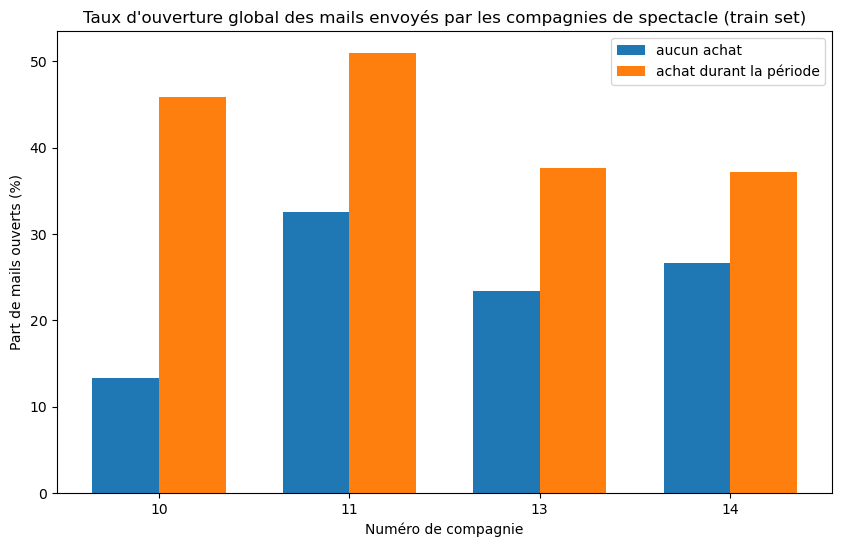

In [123]:
multiple_barplot(company_campaigns_stats, x="number_company", y="perc_campaigns_opened", var_labels="y_has_purchased",
                dico_labels = {0 : "clients n'ayant pas acheté", 1 : "clients ayant acheté sur la période"},
                xlabel = "Numéro de compagnie", ylabel = "Part de mails ouverts (%)", 
                title = "Taux d'ouverture global des mails envoyés par les compagnies de spectacle (train set)")

### 3. products_purchased_reduced

In [16]:
# nombre de nan
print("Nombre de lignes de la table : ",products_purchased_reduced_spectacle.shape[0])
products_purchased_reduced_spectacle.isna().sum()

Nombre de lignes de la table :  764880


customer_id              0
nb_tickets               0
nb_purchases             0
total_amount             0
nb_suppliers             0
vente_internet_max       0
purchase_date_min        0
purchase_date_max        0
time_between_purchase    0
nb_tickets_internet      0
number_compagny          0
dtype: int64

In [21]:
#importation librairies
import warnings
warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
import statsmodels
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from numpy.random import randn
import scipy.stats as st
%matplotlib inline

#col_purchase=["nb_tickets","nb_purchases","total_amount","nb_suppliers","time_between_purchase","nb_tickets_internet"]

In [39]:
#identification des valeur manquantes
#calcule des quartile de la variable valeur(taille de la population)
Q1=np.percentile(products_purchased_reduced_spectacle["total_amount"], 25)  # Q1
Q2=np.percentile(products_purchased_reduced_spectacle["total_amount"], 50)  # Q2
Q3=np.percentile(products_purchased_reduced_spectacle["total_amount"], 75)  # Q3
print(Q1)
print(Q2)
print(Q3)

#intervale interquartile de la variable Valeur

IQ=Q3-Q1
print(IQ)

#la valeur minimale des moustache de la variable Valeur

M_inf=Q1-1.5*IQ
M_sup=Q3+1.5*IQ

print("Moustache inferieure",M_inf)#moustache inferieur
print("Moustache superieure",M_sup)#moustache sup


30.0
62.0
120.0
90.0
Moustache inferieure -105.0
Moustache superieure 255.0


In [62]:
products_purchased_reduced_spectacle.dtypes

customer_id                int64
nb_tickets                 int64
nb_purchases               int64
total_amount             float64
nb_suppliers               int64
vente_internet_max         int64
purchase_date_min        float64
purchase_date_max        float64
time_between_purchase    float64
nb_tickets_internet      float64
number_compagny            int64
dtype: object

#histogrames des variable quantitatives
col_purchase=["nb_tickets","nb_purchases","total_amount","nb_suppliers","time_between_purchase","nb_tickets_internet"]
for col in col_purchase:
    plt.figure()
    sns.histplot(products_purchased_reduced_spectacle[col], kde=True, color='red')

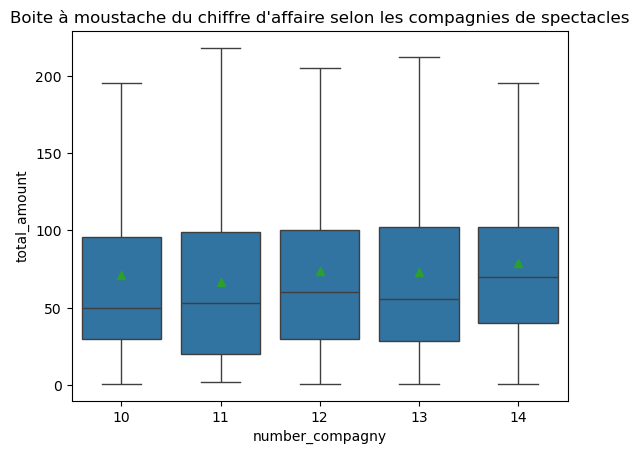

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrer les données pour inclure uniquement les valeurs positives de total_amount et exclusion des valeur aberrantes
filtered_products_purchased_reduced_spectacle = products_purchased_reduced_spectacle[(products_purchased_reduced_spectacle['total_amount'] > 0) & (products_purchased_reduced_spectacle['total_amount'] <= 255)]

# Créer le graphique en utilisant les données filtrées
sns.boxplot(data=filtered_data, y="total_amount", x="number_compagny", showfliers=False, showmeans=True)

# Titre du graphique
plt.title("Boite à moustache du chiffre d'affaire selon les compagnies de spectacles")

# Afficher le graphique
plt.show()


In [87]:
#test d'anova pour voir si la difference de chiffre d'affaire est statistiquement significative

from scipy.stats import f_oneway

# Créez une liste pour stocker les données de chaque groupe
groupes = []

# Parcourez chaque modalité de la variable catégorielle et divisez les données en groupes
for modalite in filtered_products_purchased_reduced_spectacle['number_compagny'].unique():
    groupe = filtered_products_purchased_reduced_spectacle[filtered_products_purchased_reduced_spectacle['number_compagny'] == modalite]['total_amount']
    groupes.append(groupe)

# Effectuez le test ANOVA
f_statistic, p_value = f_oneway(*groupes)

# Nombre total d'observations
N = sum(len(groupe) for groupe in groupes)

# Nombre de groupes ou de catégories
k = len(groupes)

# Degrés de liberté entre les groupes
df_between = k - 1

# Degrés de liberté à l'intérieur des groupes
df_within = N - k

# Affichez les résultats
print("Statistique F :", f_statistic)
print("Valeur de p :", p_value)

print("Nombre de degrés de liberté entre les groupes :", df_between)
print("Nombre de degrés de liberté à l'intérieur des groupes :", df_within)

if p_value < 0.05:
    print("Il y a des différences significatives entre au moins une des entrepries .")
else:
    print("Il n'y a pas de différences significatives entre les entreprises .")

Statistique F : 317.1792172580724
Valeur de p : 3.665389608154993e-273
Nombre de degrés de liberté entre les groupes : 4
Nombre de degrés de liberté à l'intérieur des groupes : 670581
Il y a des différences significatives entre au moins une des entrepries .


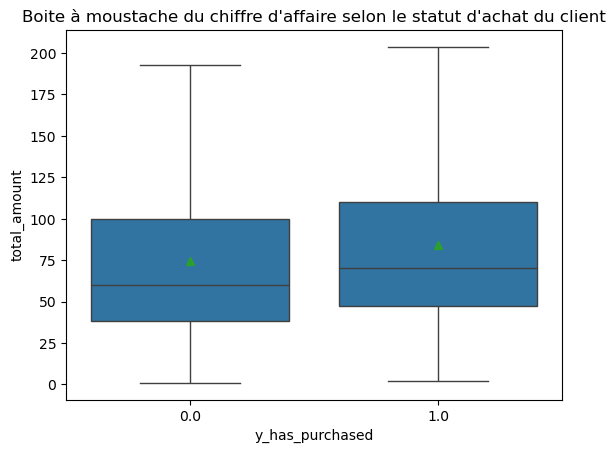

In [129]:
#repartition Chiffre d'affaire selon y_has_purchased

# Filtrer les données pour inclure uniquement les valeurs positives de total_amount et exclusion des valeur aberrantes
train_set_spectacle_filtered = train_set_spectacle[(train_set_spectacle['total_amount'] > 0) & (train_set_spectacle['total_amount'] <= 255)]

# Créer le graphique en utilisant les données filtrées
sns.boxplot(data=train_set_spectacle_filtered, y="total_amount", x="y_has_purchased", showfliers=False, showmeans=True)

# Titre du graphique
plt.title("Boite à moustache du chiffre d'affaire selon le statut d'achat du client")

# Afficher le graphique
plt.show()

In [ ]:
#graphe sur le taux de ticket acheté

In [89]:
#Taux de ticket payé par internet selon les compagnies

purchase_spectacle = products_purchased_reduced_spectacle.groupby("number_compagny")[["nb_tickets", "nb_tickets_internet"]].sum().reset_index()
purchase_spectacle["Taux_ticket_internet"] = purchase_spectacle["nb_tickets_internet"]*100 / purchase_spectacle["nb_tickets"]
purchase_spectacle

number_compagny  nb_tickets  nb_tickets_internet  Taux_ticket_internet
0               10      492314             126262.0             25.646640
1               11      318969              16348.0              5.125263
2               12      591028              42045.0              7.113876
3               13     7024227            1247482.0             17.759705
4               14      335741             125638.0             37.421107

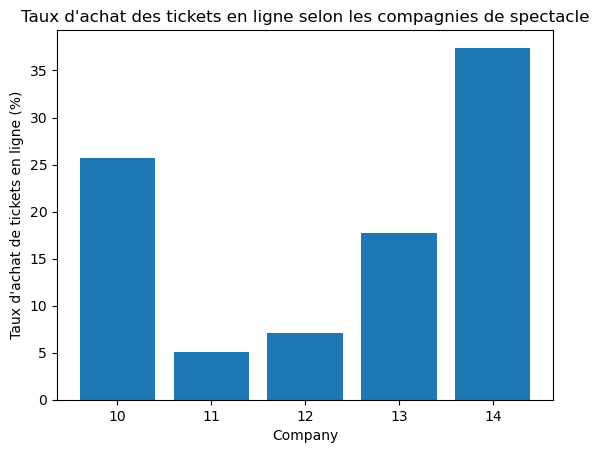

In [90]:
# Création du barplot
plt.bar(purchase_spectacle["number_compagny"],  purchase_spectacle["Taux_ticket_internet"])

# Ajout de titres et d'étiquettes
plt.xlabel('Company')
plt.ylabel("Taux d'achat de tickets en ligne (%)")
plt.title("Taux d'achat des tickets en ligne selon les compagnies de spectacle")

# Affichage du barplot
plt.show()

In [133]:
#Taux de ticket payé  en ligne selon y_has_purchase par  compagnies avec la base de train

purchase_spectacle_train = train_set_spectacle.groupby(["number_company", "y_has_purchased"])[["nb_tickets", "nb_tickets_internet"]].sum().reset_index()
purchase_spectacle_train["Taux_ticket_internet"] = purchase_spectacle_train["nb_tickets_internet"]*100 / purchase_spectacle_train["nb_tickets"]
purchase_spectacle_train

number_company  y_has_purchased  nb_tickets  nb_tickets_internet  \
0              10              0.0      9957.0               5450.0   
1              10              1.0      7941.0               3424.0   
2              11              0.0     10361.0                  5.0   
3              11              1.0      9638.0                  0.0   
4              12              0.0     35600.0                  0.0   
5              12              1.0     11520.0                  0.0   
6              13              0.0    131759.0             105406.0   
7              13              1.0   1004076.0              13902.0   
8              14              0.0     44596.0                  0.0   
9              14              1.0     16694.0                  0.0   

   Taux_ticket_internet  
0             54.735362  
1             43.117995  
2              0.048258  
3              0.000000  
4              0.000000  
5              0.000000  
6             79.999089  
7              1.384557  
8              0.000000  
9              0.000000

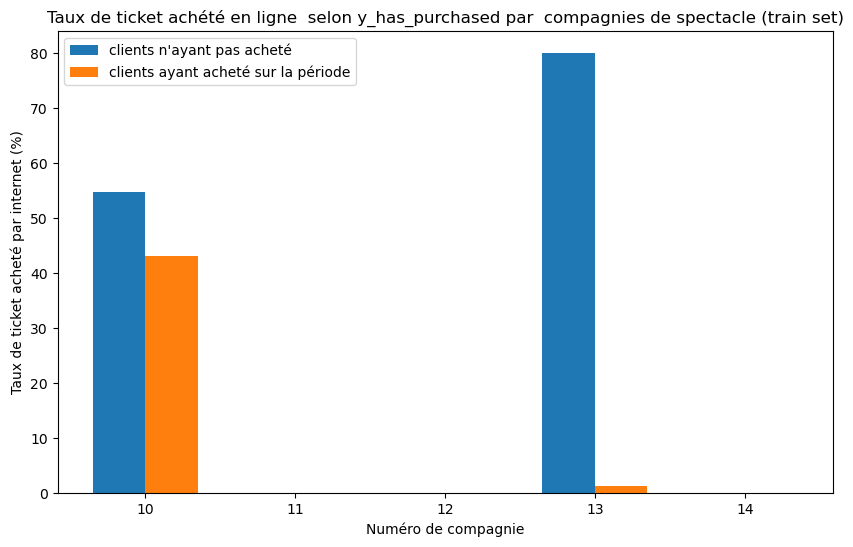

In [106]:
multiple_barplot(purchase_spectacle_train, x="number_company", y="Taux_ticket_internet", var_labels="y_has_purchased",
                dico_labels = {0 : "clients n'ayant pas acheté", 1 : "clients ayant acheté sur la période"},
                xlabel = "Numéro de compagnie", ylabel = "Taux de ticket acheté par internet (%)", 
                title = "Taux de ticket achété en ligne  selon y_has_purchased par  compagnies de spectacle (train set)")

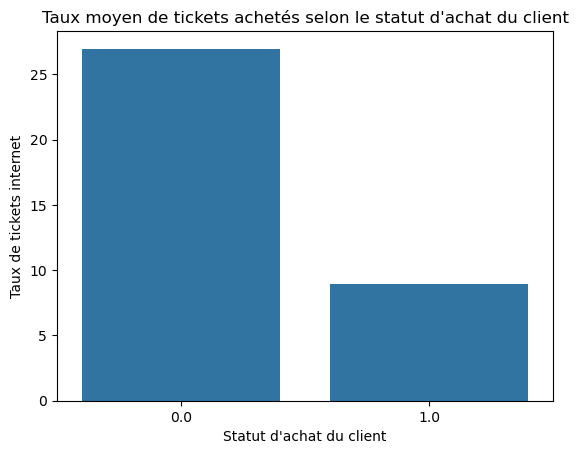

In [140]:
import seaborn as sns


# Créer le graphique à barres
sns.barplot(data=purchase_spectacle_train, x="y_has_purchased", y="Taux_ticket_internet",ci=None)


# Titre du graphique
plt.title("Taux moyen de tickets achetés selon le statut d'achat du client")

# Ajouter une étiquette à l'axe des abscisses
plt.xlabel("Statut d'achat du client")

# Ajouter une étiquette à l'axe des ordonnées
plt.ylabel("Taux de tickets internet")

# Afficher le graphique
plt.show()


In [107]:
#stat sur la variable temps ecoulé entre le premier et le dernier achat

Text(0.5, 1.0, 'Boite à moustache du temps ecoulés entre le premier et le dernier achat selon les compagnies de spectacles')

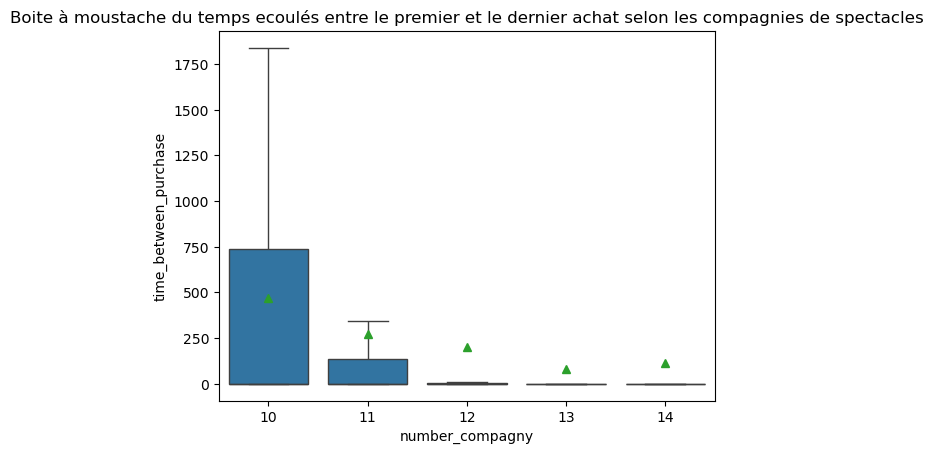

In [108]:
#repartition des client selon le temps ecoulés entre le premier et le denier achat par  compagnie

sns.boxplot(data=products_purchased_reduced_spectacle, y="time_between_purchase",x="number_compagny",showfliers=False,showmeans=True)
plt.title("Boite à moustache du temps ecoulés entre le premier et le dernier achat selon les compagnies de spectacles")

In [109]:
#test d'anova pour voir si la difference de temps entre le premier et le dernier achat est statistiquement significative

from scipy.stats import f_oneway

# Créez une liste pour stocker les données de chaque groupe
groupes = []

# Parcourez chaque modalité de la variable catégorielle et divisez les données en groupes
for modalite in products_purchased_reduced_spectacle['number_compagny'].unique():
    groupe = products_purchased_reduced_spectacle[products_purchased_reduced_spectacle['number_compagny'] == modalite]['time_between_purchase']
    groupes.append(groupe)

# Effectuez le test ANOVA
f_statistic, p_value = f_oneway(*groupes)

# Nombre total d'observations
N = sum(len(groupe) for groupe in groupes)

# Nombre de groupes ou de catégories
k = len(groupes)

# Degrés de liberté entre les groupes
df_between = k - 1

# Degrés de liberté à l'intérieur des groupes
df_within = N - k

# Affichez les résultats
print("Statistique F :", f_statistic)
print("Valeur de p :", p_value)

print("Nombre de degrés de liberté entre les groupes :", df_between)
print("Nombre de degrés de liberté à l'intérieur des groupes :", df_within)

if p_value < 0.05:
    print("Il y a des différences significatives entre au moins une des entrepries .")
else:
    print("Il n'y a pas de différences significatives entre les entreprises .")

Statistique F : 7956.05932109542
Valeur de p : 0.0
Nombre de degrés de liberté entre les groupes : 4
Nombre de degrés de liberté à l'intérieur des groupes : 764875
Il y a des différences significatives entre au moins une des entrepries .


In [111]:
#repartition des client selon le temps ecoulés entre le premier et le denier achat par  compagnie
purchase_train_time= train_set_spectacle.groupby(["number_company", "y_has_purchased"])["time_between_purchase"].mean().reset_index()
purchase_train_time

number_company  y_has_purchased  time_between_purchase
0              10              0.0              45.791114
1              10              1.0             193.080793
2              11              0.0              27.640469
3              11              1.0             129.853892
4              12              0.0              16.418446
5              12              1.0              58.548598
6              13              0.0              10.012525
7              13              1.0              93.545373
8              14              0.0               3.879196
9              14              1.0              10.745213

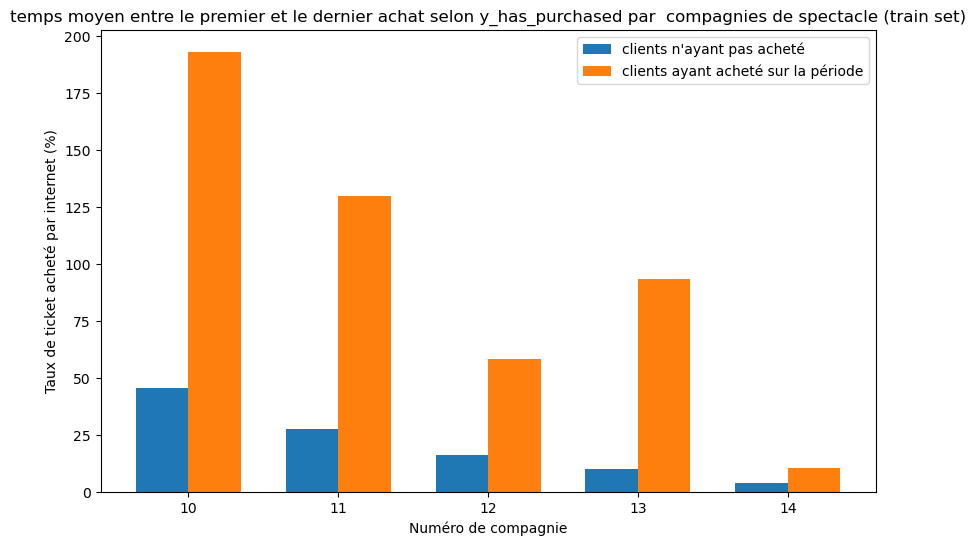

In [113]:
multiple_barplot(purchase_train_time, x="number_company", y="time_between_purchase", var_labels="y_has_purchased",
                dico_labels = {0 : "clients n'ayant pas acheté", 1 : "clients ayant acheté sur la période"},
                xlabel = "Numéro de compagnie", ylabel = "Taux de ticket acheté par internet (%)", 
                title = "temps moyen entre le premier et le dernier achat selon y_has_purchased par  compagnies de spectacle (train set)")

In [33]:
products_purchased_reduced_spectacle.dtypes

customer_id                int64
nb_tickets                 int64
nb_purchases               int64
total_amount             float64
nb_suppliers               int64
vente_internet_max         int64
purchase_date_min        float64
purchase_date_max        float64
time_between_purchase    float64
nb_tickets_internet      float64
number_compagny            int64
dtype: object

In [114]:
products_purchased_reduced_spectacle

customer_id  nb_tickets  nb_purchases  total_amount  nb_suppliers  \
0            19482          88            29         872.0             2   
1            19484           3             2          62.0             1   
2            19485         131            21        1878.0             2   
3            19486          10             4          96.0             1   
4            19487           2             1          33.0             1   
...            ...         ...           ...           ...           ...   
99580      6884747           2             1          40.0             1   
99581      6884748           2             1          40.0             1   
99582      6884750           4             1          80.0             1   
99583      6884751           2             1          40.0             1   
99584      6884753           2             1          40.0             1   

       vente_internet_max  purchase_date_min  purchase_date_max  \
0                       1        2643.092500         718.149398   
1                       0        1745.021736        1743.045035   
2                       1        2649.044745          85.240845   
3                       0        1944.077604        1742.794225   
4                       0        1742.877766        1742.877766   
...                   ...                ...                ...   
99580                   0           0.193750           0.193750   
99581                   0           0.186806           0.186806   
99582                   0           0.136111           0.136111   
99583                   0           0.122917           0.122917   
99584                   0           0.047222           0.047222   

       time_between_purchase  nb_tickets_internet  number_compagny  
0                1924.943102                  8.0               10  
1                   1.976701                  0.0               10  
2                2563.803900                 84.0               10  
3                 201.283380                  0.0               10  
4                   0.000000                  0.0               10  
...                      ...                  ...              ...  
99580               0.000000                  0.0               14  
99581               0.000000                  0.0               14  
99582               0.000000                  0.0               14  
99583               0.000000                  0.0               14  
99584               0.000000                  0.0               14  

[764880 rows x 11 columns]

In [ ]:
#Stat sur les canaux de vente

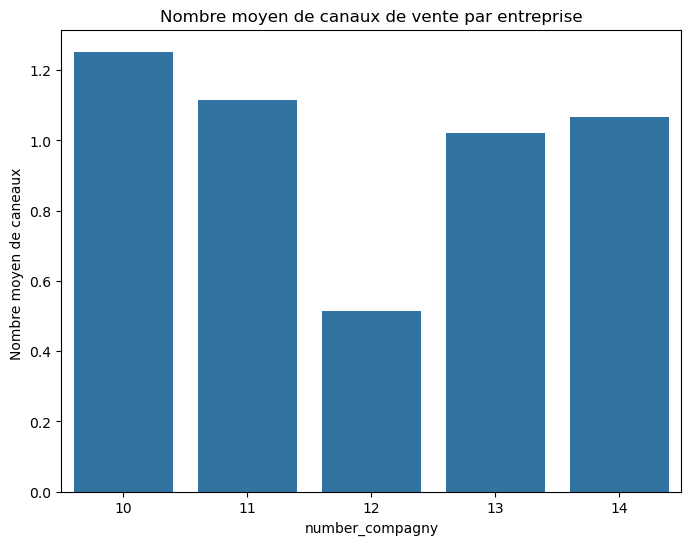

In [118]:
#Repartition du nombre de canaux de vente selon les entreprise

# Filtrer les données pour inclure uniquement les valeurs positives de total_amount et exclusion des valeur aberrantes
purchase_canaux = products_purchased_reduced_spectacle[(products_purchased_reduced_spectacle['nb_tickets'] > 0) ]

plt.figure(figsize=(8, 6))
sns.barplot(x='number_compagny', y='nb_suppliers', data=purchase_canaux, ci=None)  # ci=None pour ne pas afficher les intervalles de confiance
plt.title('Nombre moyen de canaux de vente par entreprise')
plt.xlabel('number_compagny')
plt.ylabel('Nombre moyen de caneaux ')
plt.show()

In [120]:
train_set_spectacle["nb_suppliers"].describe()

count    697297.000000
mean          0.110917
std           0.319561
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: nb_suppliers, dtype: float64

In [125]:
#repartition des client selon le nombre moyen de canaux utilisé pour l'achat de ticket  par  compagnie sur base de train

#purchase_train_canaux = train_set_spectacle[(train_set_spectacle['nb_tickets'] > 0) ]

purchase_train_canaux_filtered= purchase_train_canaux.groupby(["number_company", "y_has_purchased"])["nb_suppliers"].mean().reset_index()
purchase_train_canaux_filtered

number_company  y_has_purchased  nb_suppliers
0              10              0.0      1.118250
1              10              1.0      1.340136
2              11              0.0      1.033992
3              11              1.0      1.155239
4              12              0.0      0.153296
5              12              1.0      0.220174
6              13              0.0      1.007711
7              13              1.0      1.083750
8              14              0.0      1.000000
9              14              1.0      1.000000

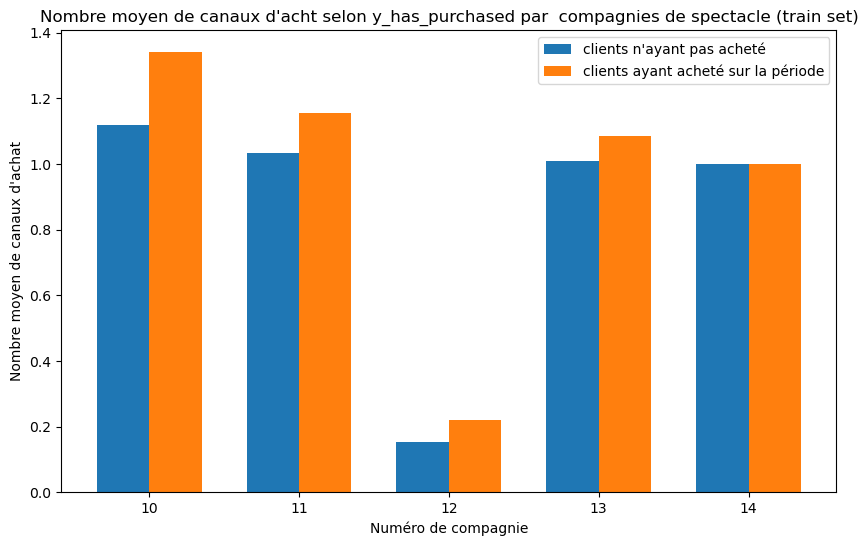

In [126]:
multiple_barplot(purchase_train_canaux_filtered, x="number_company", y="nb_suppliers", var_labels="y_has_purchased",
                dico_labels = {0 : "clients n'ayant pas acheté", 1 : "clients ayant acheté sur la période"},
                xlabel = "Numéro de compagnie", ylabel = "Nombre moyen de canaux d'achat", 
                title = "Nombre moyen de canaux d'acht selon y_has_purchased par  compagnies de spectacle (train set)")

### 4. target_information

In [11]:
# nombre de nan
print("Nombre de lignes de la table : ",target_information_spectacle.shape[0])
target_information_spectacle.isna().sum()

Nombre de lignes de la table :  6240166


id                       0
customer_id              0
target_name              0
target_type_is_import    0
target_type_name         0
number_compagny          0
dtype: int64

In [47]:
# pas exploitable